In [1]:
%matplotlib inline
import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import sklearn.metrics as metrics
import pydotplus 
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import pydotplus 
from sklearn import preprocessing

In [2]:
pd.options.mode.chained_assignment = None

# One Months Churn with Monthly Transaction Data

In [121]:
One_Month = pd.read_csv('data/March_2014_One.csv', encoding='utf-8')

In [122]:
One_Month.shape

(4360, 33)

In [123]:
One_Month.columns.values

array(['Unnamed: 0', 'gender_F', 'gender_M', 'Duration', 'EventsAttended',
       'Hprofileview', 'Hcoachimport', 'Hmessage', 'Hsearchhit',
       'Hcoacheval', 'Hemailopen', 'EAthlete newsletter', 'Eathlete_new',
       'Eathlete_new_info_request', 'ECCNote', 'ECCNote_camp',
       'Ecoach_list_known_updated', 'ECoachEmailOpen', 'ECoachEval',
       'ECoachImport', 'ECoachSearchHit', 'ECoachVisit',
       'Ecolleges_going_to_the_event', 'Efailed_subscription',
       'Eparent_new', 'Eparent_welcome', 'Epost_event_email',
       'Esms_update', 'CollegeProspects', 'MessagesReceived',
       'MessagesSent', 'monthly_price', 'TMChurn'], dtype=object)

In [124]:
Y = One_Month['TMChurn']

In [131]:
print(len(Y[Y==1]))

601


In [125]:
One_Month.drop(['TMChurn','Unnamed: 0','Duration','ECoachImport','Eathlete_new_info_request',
               'ECCNote','Esms_update'],axis = 1, inplace = True)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(One_Month, Y, test_size=0.20, random_state=0)


In [127]:
print(X_train.shape)

(3488, 26)


In [128]:
print(X_test.shape)

(872, 26)


In [129]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

3004
484


In [79]:
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))

755
117


In [80]:
import math
import numpy as np
import pandas as pd
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import cross_val_score, cross_val_predict, StratifiedKFold 
from sklearn import preprocessing, metrics, svm, ensemble
from sklearn.metrics import accuracy_score, classification_report

In [81]:
# 10 fold stratified cross validation
kf = StratifiedKFold(y_train, n_folds=10, random_state=None, shuffle=True)

# Define the parameter grid to use for tuning the Support Vector Machine
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Pick the goal you're optimizing for e.g. precision if you prefer fewer false-positives
# recall if you prefer fewer false-negatives. For demonstration purposes let's pick several
# Note that the final model selection will be based on the last item in the list
scoringmethods = ['f1','accuracy','precision', 'recall','roc_auc']

In [82]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.90      0.98      0.93       755
          1       0.65      0.26      0.38       117

avg / total       0.86      0.88      0.86       872

Accuracy: 0.882
Aucroc: 0.621


Confusion matrix, without normalization
[[738  17]
 [ 86  31]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.74  0.26]]


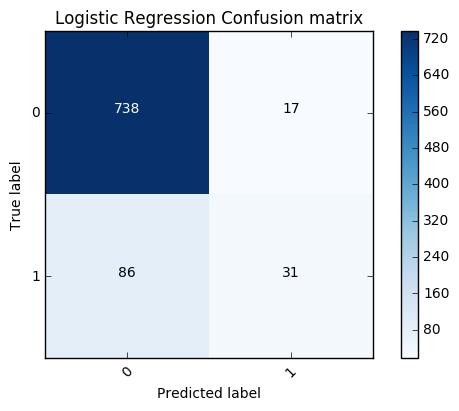

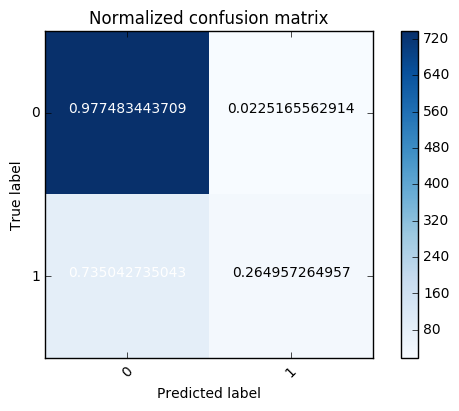

In [83]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [84]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf,
                            class_weight='balanced')
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.89      0.91       755
          1       0.43      0.56      0.49       117

avg / total       0.86      0.84      0.85       872

Accuracy: 0.842
Aucroc: 0.721


Confusion matrix, without normalization
[[669  86]
 [ 52  65]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.44  0.56]]


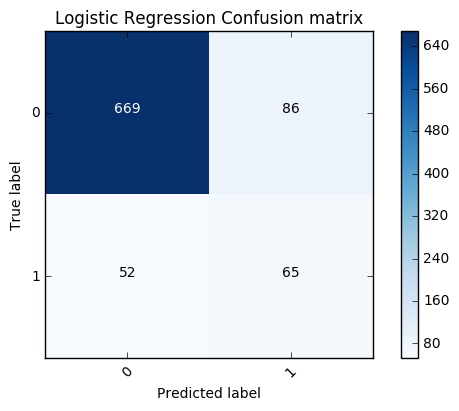

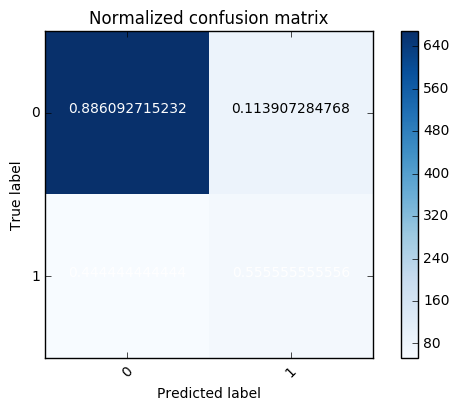

In [85]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [89]:
# Naive Bayes with 10 fold stratified cross-validation
nbclf = GaussianNB()
scores = cross_val_score(nbclf, X_train, y_train, cv=kf, scoring='roc_auc')

# Show accuracy statistics for cross-validation
print("Accuracy: %0.3f" % (scores.mean()))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train, cross_val_predict(nbclf, X_train, y_train, cv=kf)))

Accuracy: 0.711
Aucroc: 0.534


In [95]:
X_train.shape

(4142, 30)

In [86]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print("Best model:")

print (CV_rfc.best_estimator_)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = CV_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
Classification report:
             precision    recall  f1-score   support

          0       0.90      0.95      0.93       755
          1       0.53      0.35      0.42       117

avg / total       0.85      0.87      0.86       872

Accuracy: 0.870
Aucroc: 0.651


Confusion matrix, without normalization
[[718  37]
 [ 76  41]]
Normalized confusion matrix
[[ 0.95  0.05]
 [ 0.65  0.35]]


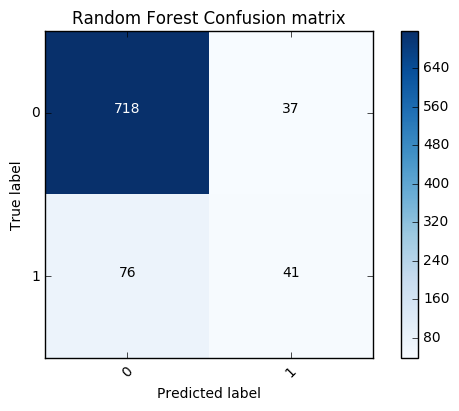

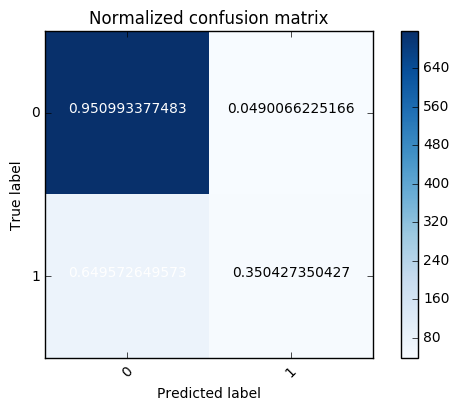

In [87]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

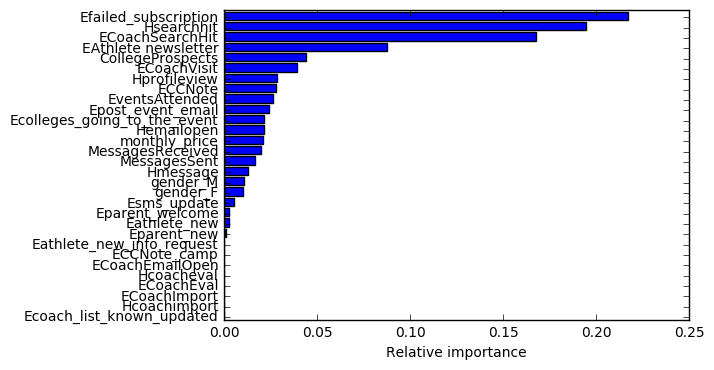

In [101]:
# sort 
names = X_train.columns.values 
indices = np.argsort(rfc.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

In [88]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train, y_train)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       755
          1       0.59      0.33      0.43       117

avg / total       0.86      0.88      0.86       872

Accuracy: 0.880
Aucroc: 0.649


In [47]:
gbclf = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
gbclf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Confusion matrix, without normalization
[[728  27]
 [ 78  39]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.67  0.33]]


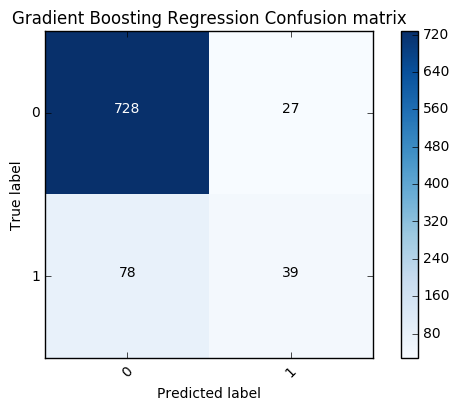

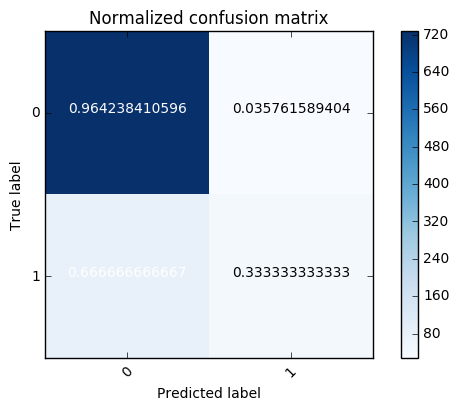

In [90]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Gradient Boosting Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

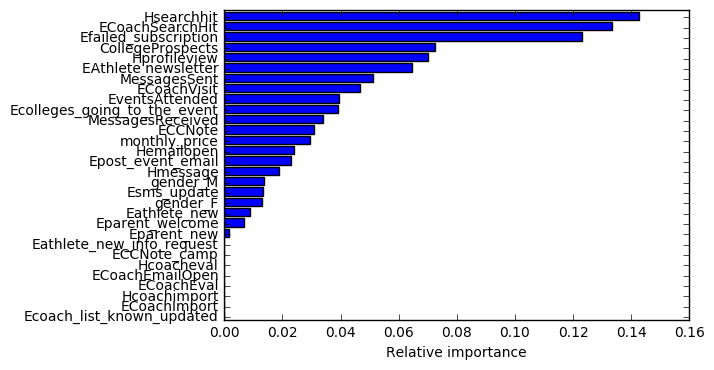

In [49]:
# sort 
names = X_train.columns.values 
indices = np.argsort(gbclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), gbclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# One Month's Churn using Aggregation of Customer Transactions

In [91]:
One_Month_freq = pd.read_csv('data/March_2014_Freq.csv', encoding='utf-8')

In [92]:
One_Month_freq.columns.values

array(['Unnamed: 0', 'gender_F', 'gender_M', 'Duration',
       'EventsAttended_Frequency', 'Hits_Frequency', 'Emails_Frequency',
       'CollegeProspects_Frequency', 'MessagesReceived_Frequency',
       'MessagesSent_Frequency', 'monthly_price', 'Hprofileview_Freq',
       'Hcoachimport_Freq', 'Hmessage_Freq', 'Hsearchhit_Freq',
       'Hcoacheval_Freq', 'Hemailopen_Freq',
       'Eathlete_new_info_request_Freq', 'Ecoach_list_known_updated_Freq',
       'ECoachEmailOpen_Freq', 'ECoachEval_Freq', 'ECoachImport_Freq',
       'ECoachSearchHit_Freq', 'ECoachVisit_Freq',
       'Ecolleges_going_to_the_event_Freq', 'Efailed_subscription_Freq',
       'Epost_event_email_Freq', 'Esms_update_Freq', 'ECCNote_Freq',
       'TMChurn'], dtype=object)

In [93]:
Y = One_Month_freq['TMChurn']

In [94]:
One_Month_freq.drop(['TMChurn','Unnamed: 0', 'Duration' ,'Efailed_subscription_Freq',
                    'ECoachImport_Freq','Eathlete_new_info_request_Freq','ECCNote_Freq','Esms_update_Freq'],axis = 1, inplace = True)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(One_Month_freq, Y, test_size=0.20, random_state=0)


In [98]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       750
          1       0.00      0.00      0.00       122

avg / total       0.74      0.86      0.80       872

Accuracy: 0.860
Aucroc: 0.500


/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[750   0]
 [122   0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


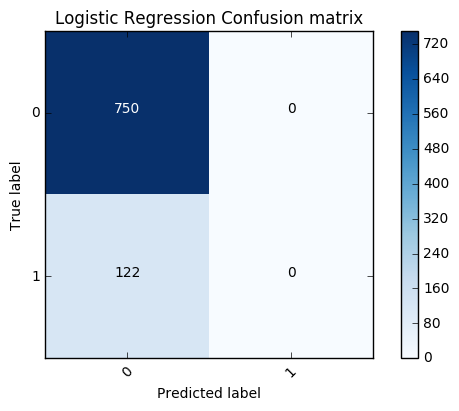

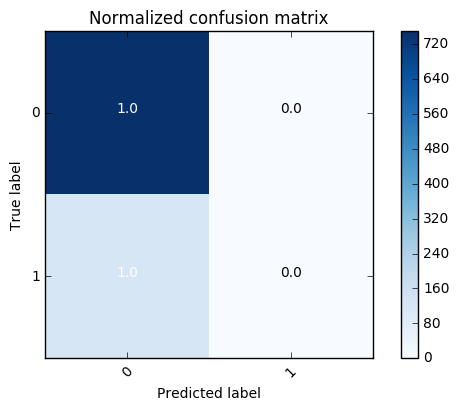

In [99]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf,class_weight='balanced')
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.90      0.55      0.68       750
          1       0.18      0.61      0.28       122

avg / total       0.80      0.56      0.63       872

Accuracy: 0.560
Aucroc: 0.583


Confusion matrix, without normalization
[[413 337]
 [ 47  75]]
Normalized confusion matrix
[[ 0.55  0.45]
 [ 0.39  0.61]]


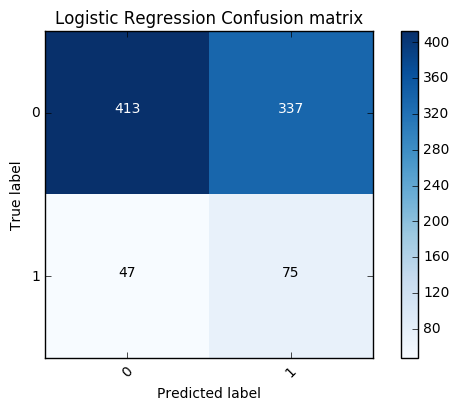

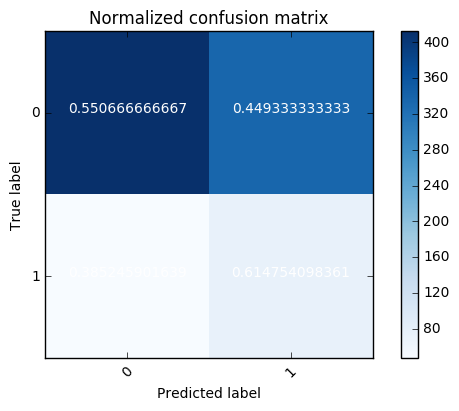

In [101]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [102]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print("Best model:")

print (CV_rfc.best_estimator_)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = CV_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
Classification report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       750
          1       0.00      0.00      0.00       122

avg / total       0.74      0.86      0.79       872

Accuracy: 0.859
Aucroc: 0.499


Confusion matrix, without normalization
[[749   1]
 [122   0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


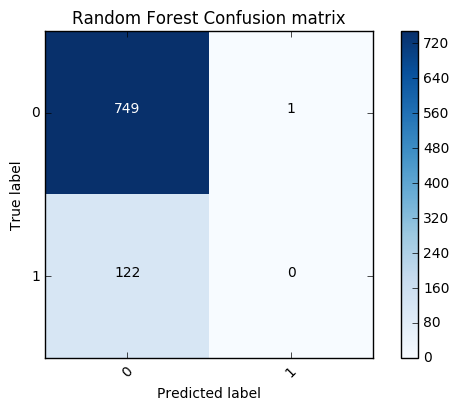

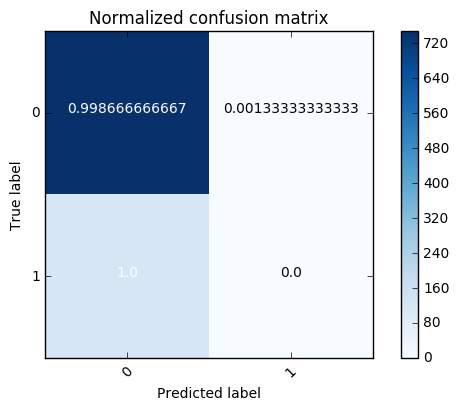

In [103]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [173]:
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

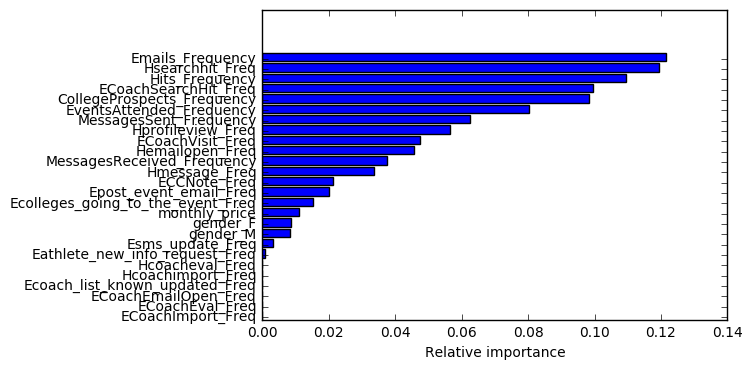

In [174]:
# sort 
names = X_train.columns.values 
indices = np.argsort(rfc.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

In [104]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train, y_train)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       750
          1       0.50      0.02      0.03       122

avg / total       0.81      0.86      0.80       872

Accuracy: 0.860
Aucroc: 0.507


In [62]:
gbclf = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
gbclf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Confusion matrix, without normalization
[[748   2]
 [120   2]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.98  0.02]]


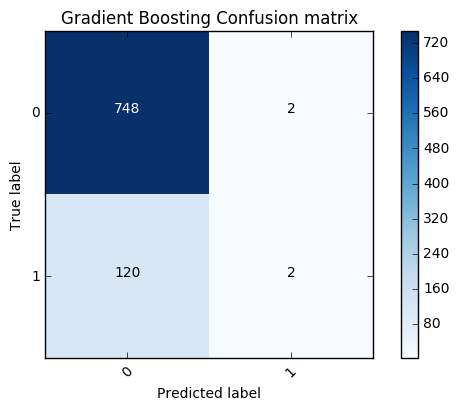

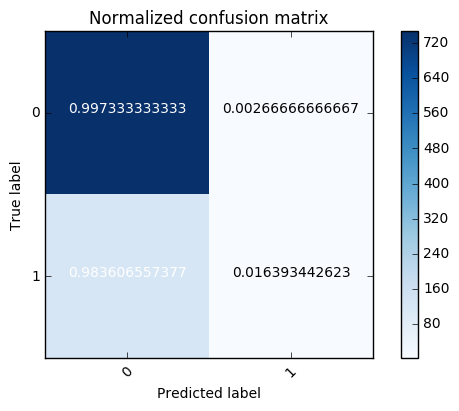

In [105]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Gradient Boosting Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

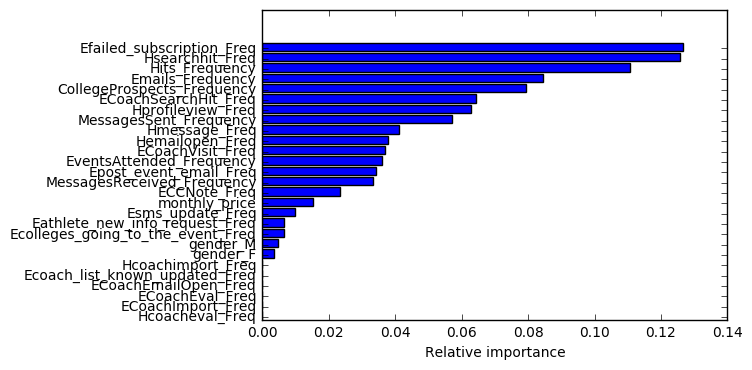

In [64]:
# sort 
names = X_train.columns.values 
indices = np.argsort(gbclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), gbclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# One Month Churn using diff variables 

In [106]:
One_Month_diff = pd.read_csv('data/March_2014_diff.csv', encoding='utf-8')

In [107]:
One_Month_diff.columns.values

array(['Unnamed: 0', 'gender_F', 'gender_M', 'EventsAttended_diff',
       'Hits_diff', 'Hprofileview_diff', 'Hmessage_diff',
       'Hsearchhit_diff', 'Hcoacheval_diff', 'Hvideoview_diff',
       'Hemailopen_diff', 'Emails_diff', 'EAthlete newsletter_diff',
       'Eathlete_new_diff', 'Eathlete_new_info_request_diff',
       'ECCNote_diff', 'ECCNote_camp_diff',
       'Ecoach_list_known_updated_diff', 'ECoachEmailOpen_diff',
       'ECoachEval_diff', 'ECoachImport_diff', 'ECoachSearchHit_diff',
       'ECoachVideoViewHit_diff', 'ECoachVisit_diff',
       'Ecolleges_going_to_the_event_diff', 'Eparent_new_diff',
       'Eparent_welcome_diff', 'Epost_event_email_diff',
       'Esms_update_diff', 'CollegeProspects_diff',
       'MessagesReceived_diff', 'MessagesSent_diff', 'CaptainU_CHURN'], dtype=object)

In [108]:
Y = One_Month_diff['CaptainU_CHURN']

In [110]:
One_Month_diff.drop(['CaptainU_CHURN','Unnamed: 0',
                    'ECoachImport_diff','Eathlete_new_info_request_diff','ECCNote_diff','Esms_update_diff'],axis = 1, inplace = True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(One_Month_diff, Y, test_size=0.20, random_state=0)


In [112]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       813
          1       0.00      0.00      0.00        60

avg / total       0.87      0.93      0.90       873

Accuracy: 0.931
Aucroc: 0.500


/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix, without normalization
[[813   0]
 [ 60   0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


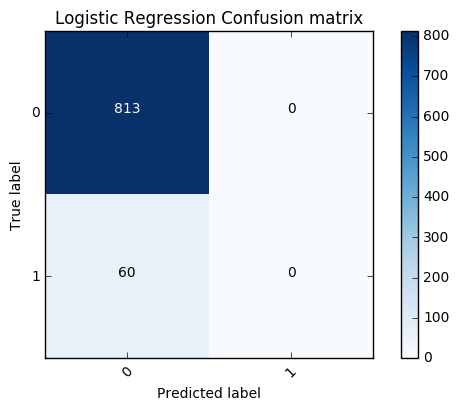

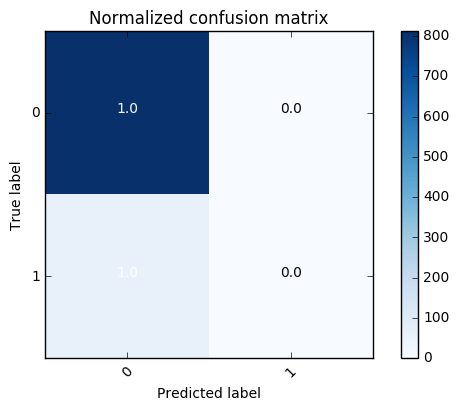

In [113]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [114]:
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf, 
                             class_weight='balanced')
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_test)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.94      0.49      0.64       813
          1       0.07      0.55      0.13        60

avg / total       0.88      0.49      0.61       873

Accuracy: 0.493
Aucroc: 0.519


Confusion matrix, without normalization
[[397 416]
 [ 27  33]]
Normalized confusion matrix
[[ 0.49  0.51]
 [ 0.45  0.55]]


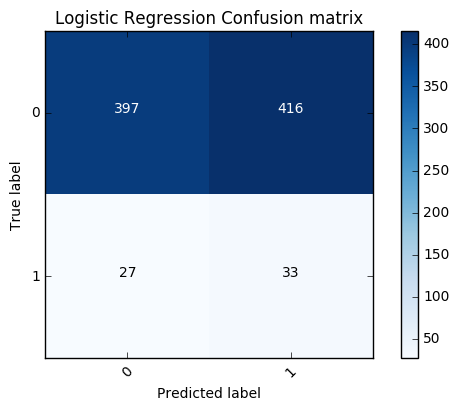

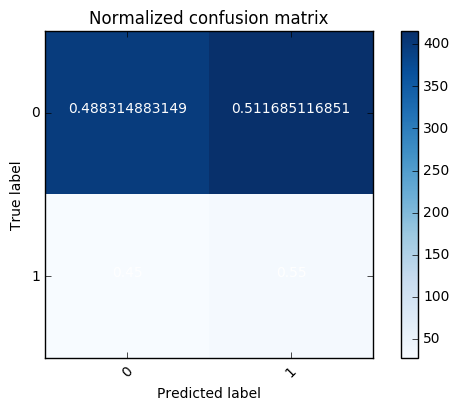

In [115]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [116]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print("Best model:")

print (CV_rfc.best_estimator_)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = CV_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=700, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
Classification report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       813
          1       0.00      0.00      0.00        60

avg / total       0.87      0.93      0.90       873

Accuracy: 0.927
Aucroc: 0.498


Confusion matrix, without normalization
[[809   4]
 [ 60   0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


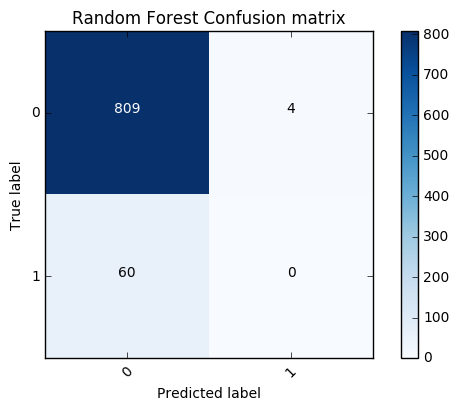

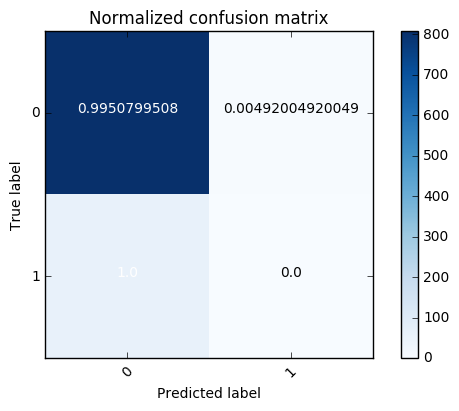

In [117]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
rfc = ensemble.RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

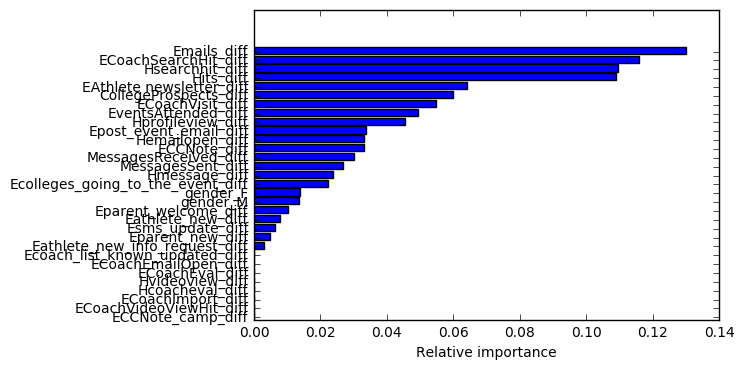

In [23]:
# sort 
names = X_train.columns.values 
indices = np.argsort(rfc.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), rfc.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

In [24]:
# Naive Bayes with 10 fold stratified cross-validation
nbclf = GaussianNB()
scores = cross_val_score(nbclf, X_train, y_train, cv=kf, scoring='roc_auc')

# Show accuracy statistics for cross-validation
print("Accuracy: %0.3f" % (scores.mean()))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train, cross_val_predict(nbclf, X_train, y_train, cv=kf)))

Accuracy: 0.551
Aucroc: 0.534


In [118]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train, y_train)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_test)
print(classification_report(y_test, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_test, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_test, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       813
          1       0.10      0.02      0.03        60

avg / total       0.87      0.92      0.90       873

Accuracy: 0.922
Aucroc: 0.503


Confusion matrix, without normalization
[[804   9]
 [ 59   1]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.98  0.02]]


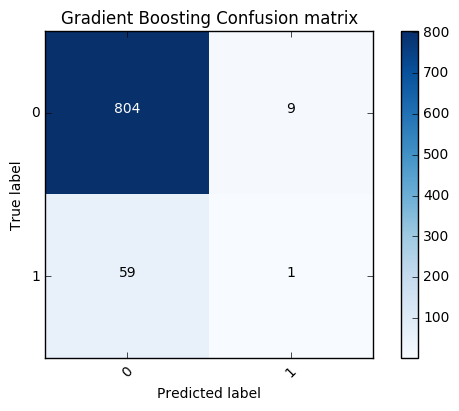

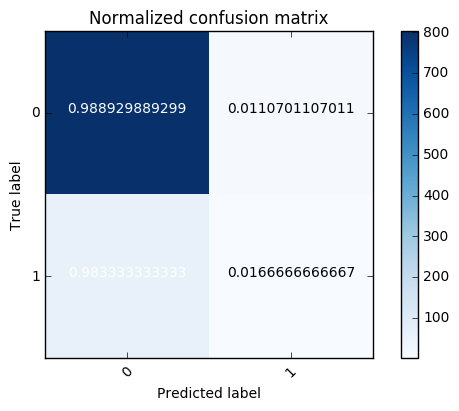

In [119]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Gradient Boosting Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [27]:
gbclf = ensemble.GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)
gbclf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

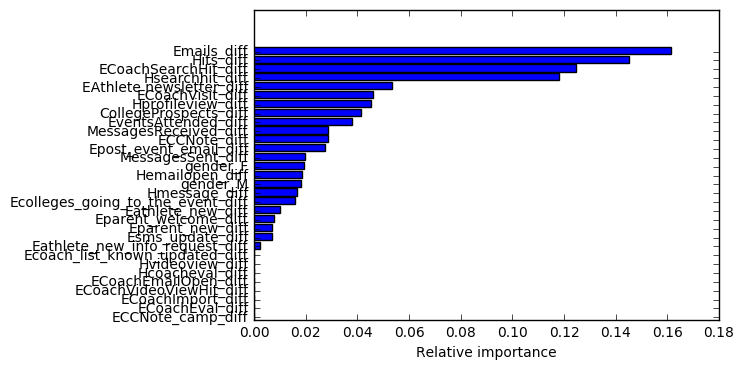

In [28]:
# sort 
names = X_train.columns.values 
indices = np.argsort(gbclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), gbclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# Validation with July Dataset with Dfii values

In [46]:
Jul_diff = pd.read_csv('data/Jul_2014_diff.csv', encoding = 'utf-8')

In [47]:
Jul_diff.columns.values

array(['Unnamed: 0', 'gender_F', 'gender_M', 'EventsAttended_diff',
       'Hits_diff', 'Hprofileview_diff', 'Hmessage_diff',
       'Hsearchhit_diff', 'Hcoacheval_diff', 'Hvideoview_diff',
       'Hemailopen_diff', 'Emails_diff', 'EAthlete newsletter_diff',
       'Eathlete_new_diff', 'Eathlete_new_info_request_diff',
       'ECCNote_diff', 'ECCNote_camp_diff',
       'Ecoach_list_known_updated_diff', 'ECoachEmailOpen_diff',
       'ECoachEval_diff', 'ECoachImport_diff', 'ECoachSearchHit_diff',
       'ECoachVideoViewHit_diff', 'ECoachVisit_diff',
       'Ecolleges_going_to_the_event_diff', 'Eparent_new_diff',
       'Eparent_welcome_diff', 'Epost_event_email_diff',
       'Esms_update_diff', 'CollegeProspects_diff',
       'MessagesReceived_diff', 'MessagesSent_diff', 'CaptainU_CHURN'], dtype=object)

In [48]:
Y = Jul_diff['CaptainU_CHURN']

In [49]:
Y.shape

(6299,)

In [50]:
Jul_diff.drop(['CaptainU_CHURN','Unnamed: 0'],axis = 1, inplace = True)

In [51]:
X_train.shape

(4142, 31)

In [52]:
Jul_diff.shape

(6299, 31)

In [53]:
y_pred = gbclf.predict(Jul_diff)

In [54]:
y_pred.shape

(6299,)

In [55]:

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
print(classification_report(Y, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(Y, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(Y, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.93      0.99      0.96      5847
          1       0.06      0.01      0.02       452

avg / total       0.87      0.92      0.89      6299

Accuracy: 0.918
Aucroc: 0.499


Confusion matrix, without normalization
[[5781   66]
 [ 448    4]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.99  0.01]]


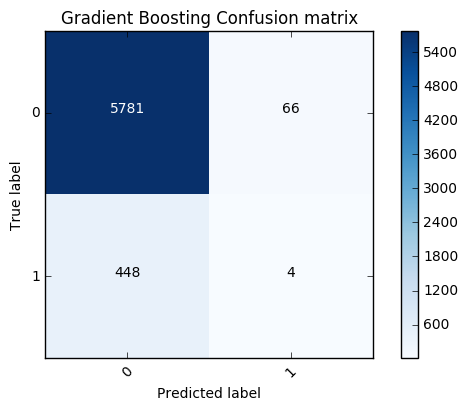

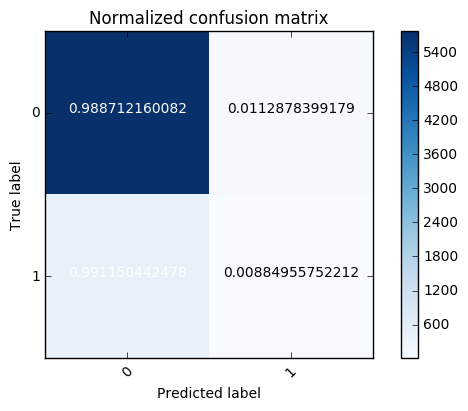

In [56]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Gradient Boosting Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Random Forest

In [57]:
y_pred = rfc.predict(Jul_diff)

In [58]:
# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
print(classification_report(Y, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(Y, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(Y, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      5847
          1       0.10      0.00      0.00       452

avg / total       0.87      0.93      0.89      6299

Accuracy: 0.927
Aucroc: 0.500


Confusion matrix, without normalization
[[5838    9]
 [ 451    1]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


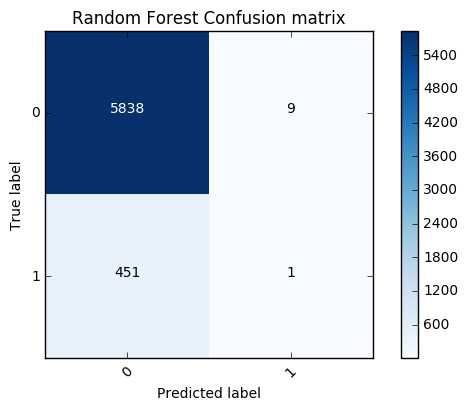

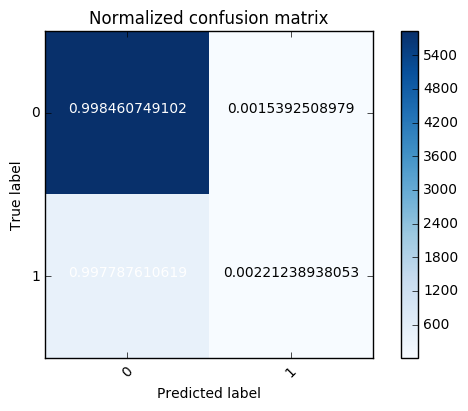

In [59]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import some data to play with
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
class_names = ['0','1']


# Split the data into a training set and a test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
#classifier = svm.SVC(kernel='linear', C=0.01)
#y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Two Month Churn

In [ ]:
Two_Month = pd.read_csv('data/Jun_2014_Two.csv', encoding='utf-8')

In [176]:
Y = Two_Month['CaptainU_CHURN']

In [177]:
Two_Month.drop(['CaptainU_CHURN','Unnamed: 0' ],axis = 1, inplace = True)

In [178]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(Two_Month, Y, test_size=0.05, random_state=0)


In [180]:
print(len(y_train_two[y_train_two==0]))
print(len(y_train_two[y_train_two==1]))

4925
326


In [181]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train_two, y_train_two)
y_pred = lgclf.predict(X_train_two)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_train_two, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_train_two, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train_two, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4925
          1       0.00      0.00      0.00       326

avg / total       0.88      0.94      0.91      5251

Accuracy: 0.938
Aucroc: 0.500


/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [183]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train_two, y_train_two)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_train_two)
print(classification_report(y_train_two, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_train_two, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train_two, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      4925
          1       0.97      0.38      0.55       326

avg / total       0.96      0.96      0.95      5251

Accuracy: 0.961
Aucroc: 0.690


# Three Month Churn

In [ ]:
Three_Month = pd.read_csv('data/March_2014.csv', encoding='utf-8')

In [185]:
Y = Three_Month['CaptainU_CHURN']

In [186]:
Three_Month.drop(['CaptainU_CHURN','Unnamed: 0' ],axis = 1, inplace = True)

In [187]:
X_train, X_test, y_train, y_test = train_test_split(Three_Month, Y, test_size=0.05, random_state=0)


In [188]:
print(X_train.shape)

(4142, 31)


In [189]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

3942
200


In [190]:
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))

209
10


In [191]:
# Logistic regression with 10 fold stratified cross-validation using model specific cross-validation in scikit-learn
lgclf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),penalty='l2',scoring='roc_auc',cv=kf)
lgclf.fit(X_train, y_train)
y_pred = lgclf.predict(X_train)

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")
print(classification_report(y_train, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_train, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train, y_pred))

Classification report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.98      3942
          1       0.00      0.00      0.00       200

avg / total       0.91      0.95      0.93      4142

Accuracy: 0.952
Aucroc: 0.500


/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [192]:
# Naive Bayes with 10 fold stratified cross-validation
nbclf = GaussianNB()
scores = cross_val_score(nbclf, X_train, y_train, cv=kf, scoring='roc_auc')

# Show accuracy statistics for cross-validation
print("Accuracy: %0.3f" % (scores.mean()))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train, cross_val_predict(nbclf, X_train, y_train, cv=kf)))

Accuracy: 0.656
Aucroc: 0.514


In [193]:
# Define the parameter grid to use for tuning the Gradient Boosting Classifier
gridparams = dict(learning_rate=[0.01, 0.1],loss=['deviance','exponential'])

# Parameters we're not tuning for this classifier
params = {'n_estimators': 1500, 'max_depth': 4}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.GradientBoostingClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train, y_train)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_train)
print(classification_report(y_train, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_train, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train, y_pred))

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      3942
          1       0.98      0.45      0.62       200

avg / total       0.97      0.97      0.97      4142

Accuracy: 0.973
Aucroc: 0.725


In [59]:
gridparams = {"max_depth": [4],
              "bootstrap": [True],
              "criterion": [ "entropy"]}

# Parameters we're not tuning for this classifier
params = {'n_estimators': 100}

# Setup for grid search with cross-validation for Gradient Boosting Classifier
# n_jobs=-1 for parallel execution using all available cores
gbclf = GridSearchCV(ensemble.RandomForestClassifier(**params), gridparams, cv=kf, scoring='roc_auc',n_jobs=-1)
gbclf.fit(X_train, y_train)

# Show the definition of the best model
print("Best model:")
print(gbclf.best_estimator_)
print("")

# Show classification report for the best model (set of parameters) run over the full dataset
print("Classification report:")    
y_pred = gbclf.predict(X_train)
print(classification_report(y_train, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_train, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train, y_pred))

Best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Classification report:
             precision    recall  f1-score   support

          0       0.92      1.00      0.96      3828
          1       0.00      0.00      0.00       314

avg / total       0.85      0.92      0.89      4142

Accuracy: 0.924
Aucroc: 0.500


/Users/jamesmwakichako/Documents/Kaggle/kaggle_py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=10):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 print(feature_names[top_coefficients])
 plt.show()

plot_coefficients(gbclf, X_train.columns.values)

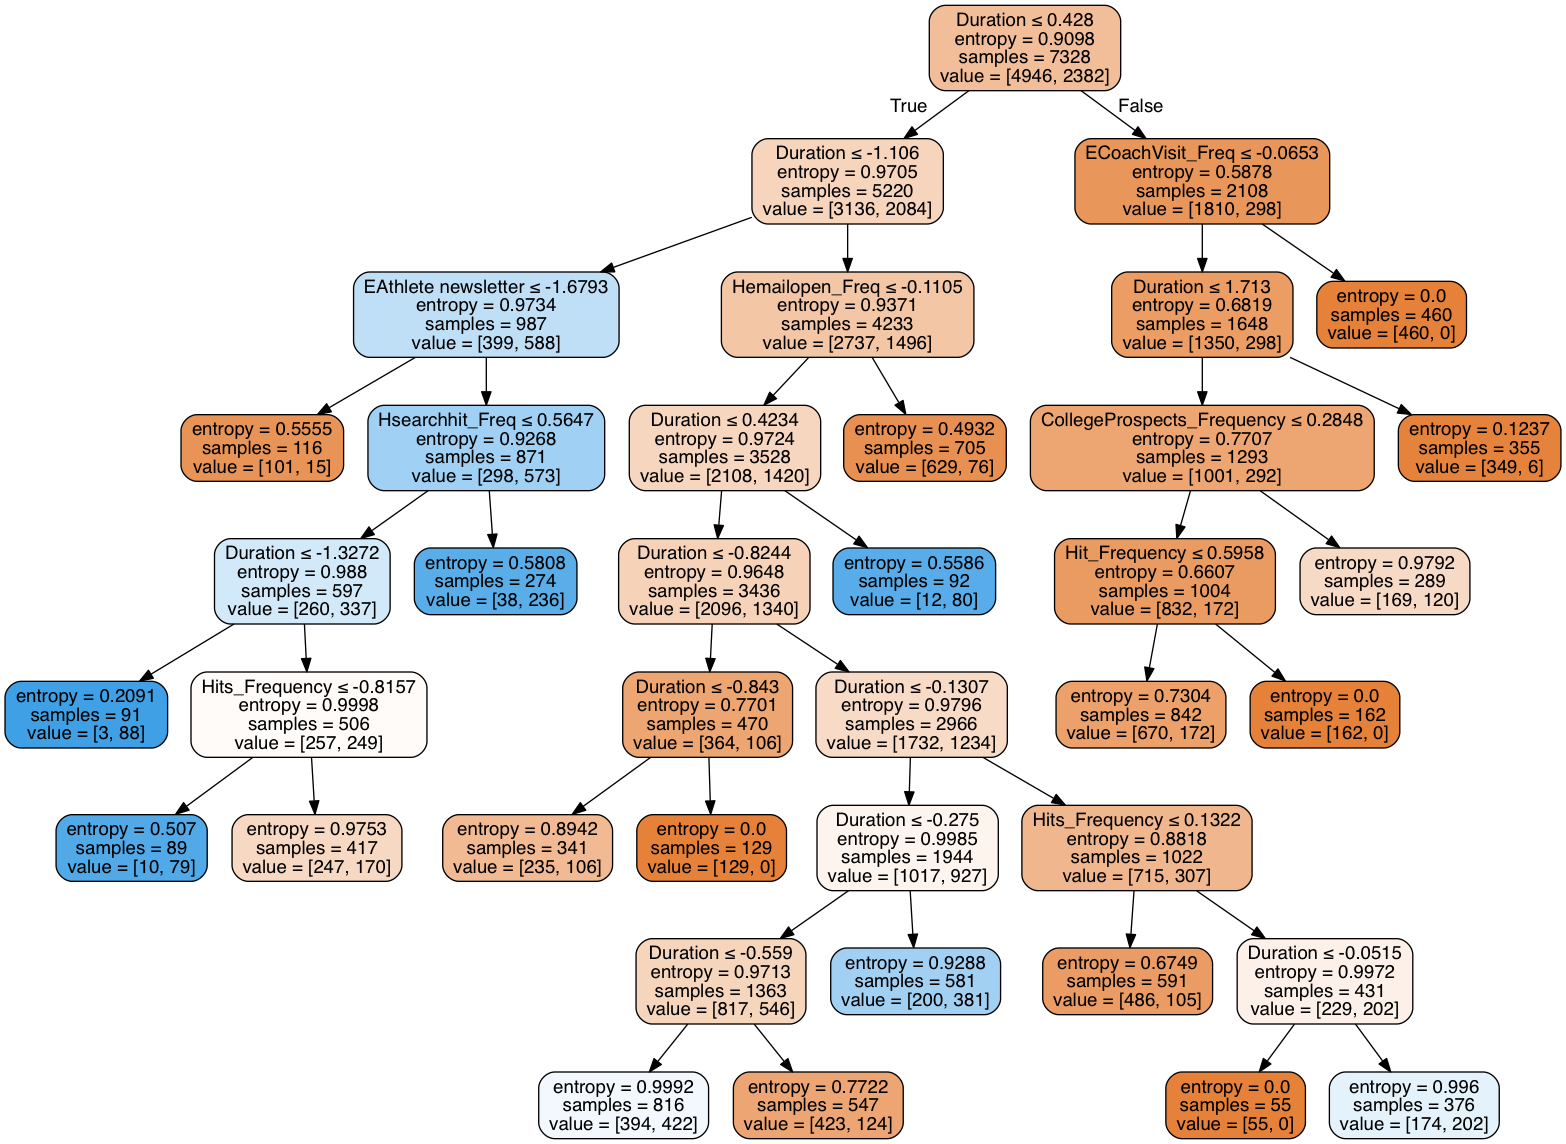

In [291]:
clf = tree.DecisionTreeClassifier(max_depth=7,max_leaf_nodes=20, criterion='entropy')
clf = clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,    
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

In [58]:
parameters = {'max_depth':[3,20]}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X_train,y_train )
y_pred = clf.predict(X_train)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

print("Classification report:")
print(classification_report(y_train, y_pred))

# Show accuracy and area under ROC curve
print("Accuracy: %0.3f" % accuracy_score(y_train, y_pred, normalize=True))
print("Aucroc: %0.3f" % metrics.roc_auc_score(y_train, y_pred))


0.9275712216320618 {'max_depth': 3}
Classification report:
             precision    recall  f1-score   support

          0       0.94      0.99      0.96      3828
          1       0.69      0.18      0.29       314

avg / total       0.92      0.93      0.91      4142

Accuracy: 0.932
Aucroc: 0.587
